# Introduction

The goal of Marmot **quickplots** and **scenariohandlers** is ease common PCM analysis and provide building blocks of various subplots that are editable to the end-users goals. Currently integrated PCM tools include Plexos, Sienna, and EGRET.

The **quickplots** and **scenariohandlers** modules expect/produce pandas dataframes in a column oriented order with an index of timestamps and a column for each generator. Furthermore, they both operate using the multi-index column functionality available in pandas to aggregate by technology types (Wind, PV, Gas, Coal, etc.) and entities (Nodes, Regions, Balancing Areas, ISO zones, etc.)


The main plot types are broken into the following categories.
1. Dispatch/Curtailment Stacks
2. Peak/Min Demand Windows
3. Transmission Flows (Coming Soon)


For examples using ReEDS technologies common here at NREL, see the **plexos_reeds_dispatch.ipynb** notebook.

In [1]:
import marmot.quickplots as qp
from marmot.scenariohandlers import PlexosScenario
import matplotlib.pyplot as plt
ps = PlexosScenario(r'../example-data/hourly/Base DA') #Directory of h5 files (Not Marmot Formatted)
df = ps.get_generators()
df.head(2)


Unable to open map
Unable to open map
Unable to open map
Unable to open map


,212_csp,101_3,101_4,102_3,102_4,115_3,116_1,123_2,123_3,201_3,...,313_rtpv_3,313_rtpv_4,313_rtpv_5,313_rtpv_6,313_rtpv_7,313_rtpv_8,313_rtpv_9,122_wind,309_wind,B301
index,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,200.0,30.0,30.0,30.0,30.0,62.0,62.00000,62.0,141.466267,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,713.2,142.8,0.0
2024-01-01 01:00:00,30.0,30.0,30.0,30.0,30.0,62.0,66.37531,62.0,163.333333,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,712.8,139.1,0.0


In [2]:
gen_all = ps.get_generators_tech()
gen_all.head(2)

Technology              CSP Coal/Steam                                     
Generator           212_csp      101_3 101_4 102_3 102_4 115_3     116_1   
index                                                                      
2024-01-01 00:00:00   200.0       30.0  30.0  30.0  30.0  62.0  62.00000  \
2024-01-01 01:00:00    30.0       30.0  30.0  30.0  30.0  62.0  66.37531   

Technology                                   ...       RTPV              
Generator           123_2       123_3 201_3  ... 313_rtpv_3 313_rtpv_4   
index                                        ...                         
2024-01-01 00:00:00  62.0  141.466267  30.0  ...        0.0        0.0  \
2024-01-01 01:00:00  62.0  163.333333  30.0  ...        0.0        0.0   

Technology                                                                   
Generator           313_rtpv_5 313_rtpv_6 313_rtpv_7 313_rtpv_8 313_rtpv_9   
index                                                                        
2024-01-01 00:00:00        0.0        0.0        0.0        0.0        0.0  \
2024-01-01 01:00:00        0.0        0.0        0.0        0.0        0.0   

Technology              Wind          Battery  
Generator           122_wind 309_wind    B301  
index                                          
2024-01-01 00:00:00    713.2    142.8     0.0  
2024-01-01 01:00:00    712.8    139.1     0.0  

[2 rows x 124 columns]

The quickplots library tries to match as many technologies to standard colors as it can, and assigns a random color to the any remaining technologies.

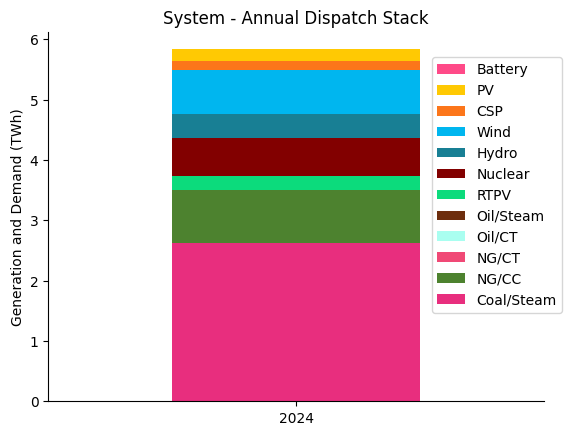

In [4]:
ax = qp.plot_annual_system_dispatch_stack(gen_all)

In order to use the standard plotting colors, one must map the PCM specific generator technologies to a standard technology type. e.g. RTPV -> dPV.

To do this, one can initialize the PlexosScenario object with a specific map (dictionary or path to json file), or update the _tech_simple attribute after initialization.

In [7]:
# Remap Technologies to Standard Technology Names
tech_simple = {    
    "Coal/Steam":"Coal",
    "RTPV":"dPV",
    'NG/CC':"Gas-CC",
    'NG/CT':"Gas-CT",
    "Oil/CT":"Oil",
    "Oil/Steam":"Oil",    
}
ps._tech_simple = tech_simple

gen_all = ps.get_generators_tech()
gen_all.head()

Technology              CSP  Coal                                           
Generator           212_csp 101_3 101_4 102_3 102_4      115_3      116_1   
index                                                                       
2024-01-01 00:00:00   200.0  30.0  30.0  30.0  30.0  62.000000  62.000000  \
2024-01-01 01:00:00    30.0  30.0  30.0  30.0  30.0  62.000000  66.375310   
2024-01-01 02:00:00    30.0  30.0  30.0  30.0  30.0  72.333333  72.333333   
2024-01-01 03:00:00    30.0  30.0  30.0  30.0  30.0  62.000000  69.833333   
2024-01-01 04:00:00    30.0  30.0  30.0  30.0  30.0  93.000000  90.633333   

Technology                                        ...        dPV              
Generator                123_2       123_3 201_3  ... 313_rtpv_3 313_rtpv_4   
index                                             ...                         
2024-01-01 00:00:00  62.000000  141.466267  30.0  ...        0.0        0.0  \
2024-01-01 01:00:00  62.000000  163.333333  30.0  ...        0.0        0.0   
2024-01-01 02:00:00  62.000000  163.333333  30.0  ...        0.0        0.0   
2024-01-01 03:00:00  62.000000  163.333333  30.0  ...        0.0        0.0   
2024-01-01 04:00:00  82.666667  186.666667  30.0  ...        0.0        0.0   

Technology                                                                   
Generator           313_rtpv_5 313_rtpv_6 313_rtpv_7 313_rtpv_8 313_rtpv_9   
index                                                                        
2024-01-01 00:00:00        0.0        0.0        0.0        0.0        0.0  \
2024-01-01 01:00:00        0.0        0.0        0.0        0.0        0.0   
2024-01-01 02:00:00        0.0        0.0        0.0        0.0        0.0   
2024-01-01 03:00:00        0.0        0.0        0.0        0.0        0.0   
2024-01-01 04:00:00        0.0        0.0        0.0        0.0        0.0   

Technology              Wind          Battery  
Generator           122_wind 309_wind    B301  
index                                          
2024-01-01 00:00:00    713.2    142.8     0.0  
2024-01-01 01:00:00    712.8    139.1     0.0  
2024-01-01 02:00:00    708.4    145.3     0.0  
2024-01-01 03:00:00    710.7    144.8     0.0  
2024-01-01 04:00:00    701.4    137.1     0.0  

[5 rows x 124 columns]

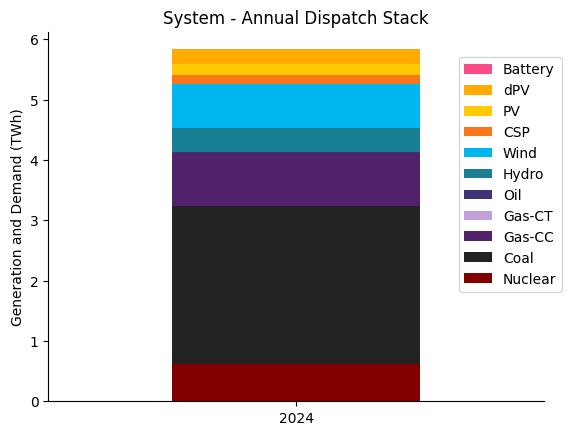

In [8]:
ax = qp.plot_annual_system_dispatch_stack(gen_all)

### Adding Entities

For PlexosScenario handlers, the raw h5 files are inspected for generator-to-entity maps and load-to-entity. This can be overridden by updating the underlying attributes with your own dictionary or passing a path to a json file upon initialization.

In [9]:
gen_tech_entity = ps.get_entity_tech_load_aggregates()
gen_tech_entity.head(2)

Entity                        1                                          
Technology                 Coal Curtailment Demand Gas-CC Gas-CT Hydro   
2024-01-01 00:00:00  447.466267         0.0  962.5    0.0    0.0  25.2  \
2024-01-01 01:00:00  473.708643         0.0  963.2    0.0    0.0  22.8   

Entity                                        ...     3               
Technology          Nuclear  Oil   PV   Wind  ...  Coal Curtailment   
2024-01-01 00:00:00   400.0  0.0  0.0  713.2  ...  62.0         0.0  \
2024-01-01 01:00:00   400.0  0.0  0.0  712.8  ...  62.0         0.0   

Entity                                                                      
Technology                Demand Gas-CC Gas-CT Hydro  Oil   PV   Wind  dPV  
2024-01-01 00:00:00  1276.399600  355.0    0.0  66.0  0.0  0.0  142.8  0.0  
2024-01-01 01:00:00  1177.241976  355.0    0.0  81.2  0.0  0.0  139.1  0.0  

[2 rows x 32 columns]

### Data manipulation

With multi-index columns we can perform standard groupby() operations along the columns.
Much of these aggregations are already taken care of behind the scenes in the various plotting functions.

In [11]:
# The axis=1 keyword argument specifies to aggregate column wise for each row. Specifying the level=Technology means we will aggregate each individual technology.
gen_tech_entity.groupby(axis=1, level='Technology' ).sum().head(2)

Technology,Battery,CSP,Coal,Curtailment,Demand,Gas-CC,Gas-CT,Hydro,Nuclear,Oil,PV,Wind,dPV
2024-01-01 00:00:00,0.0,200.0,948.799600,0.0,3298.999600,710.0,0.0,184.2,400.0,0.0,0.0,856.0,0.0
2024-01-01 01:00:00,0.0,30.0,975.041976,0.0,3165.941976,710.0,0.0,199.0,400.0,0.0,0.0,851.9,0.0


In [12]:
# Filtering - Perhaps we want to exclude zone 3 or group zones 1,2 together to get their aggregate technology dispatches.
gen_tech_entity[['1','2']].groupby(axis=1, level='Technology' ).sum().head(2)

Technology,CSP,Coal,Curtailment,Demand,Gas-CC,Gas-CT,Hydro,Nuclear,Oil,PV,Wind,dPV
2024-01-01 00:00:00,200.0,886.799600,0.0,2022.6,355.0,0.0,118.2,400.0,0.0,0.0,713.2,0.0
2024-01-01 01:00:00,30.0,913.041976,0.0,1988.7,355.0,0.0,117.8,400.0,0.0,0.0,712.8,0.0


# Plotting

Each function in **quickplots** returns a matplotlib axes object that can be updated through the matplotlib api.
You can also pass in specific axes to create various subplots and facet plots.

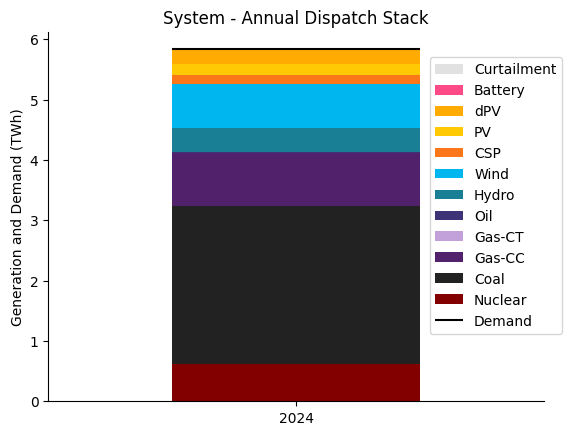

In [19]:
ax = qp.plot_annual_system_dispatch_stack(gen_tech_entity)

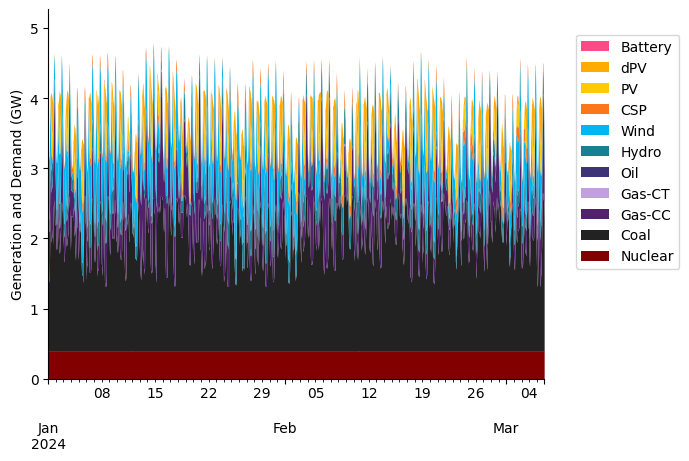

In [14]:
ax = qp.plot_stacked_area_window(gen_all.groupby(axis=1, level='Technology').sum())
ax.set_title("Example Hourly Dispatch")

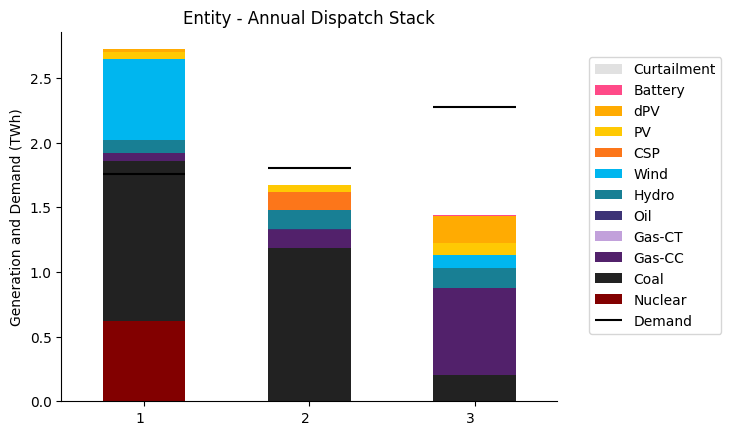

In [21]:
fig, ax = plt.subplots()
qp.plot_annual_entity_dispatch_stack(gen_tech_entity, ax=ax)
plt.xticks(rotation=0)
plt.show()

### Peak/Min Windows
**quickplots** also provides calculations for peak/min demand windows (if demand is present).

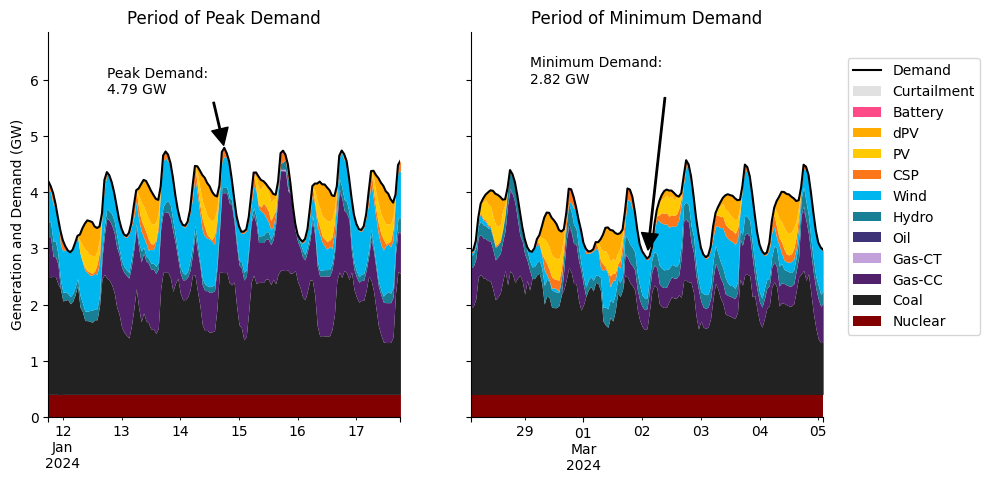

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(10,5), sharey=True)

qp.plot_peak_demand_window(gen_tech_entity,ax=axs[0])
qp.plot_min_demand_window(gen_tech_entity,ax=axs[1])
axs[0].get_legend().remove()